# Bar plots of final embryo states

This notebook documents how the stacked bar plots of final embryo states were generated for different conditions and datasets. 

These plots were used in the pub [TODO: link to pub].

## Load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# the path to the output direcetory used with `post-process-predictions`
out_json_folder = (
    '/path/to/post-processed/json-files'
)

# load all jsons files in the folder
data = pd.concat(
    [
        pd.read_json((os.path.join(out_json_folder, f)))
        for f in os.listdir(out_json_folder)
        if f.endswith('.json')
    ]
)

## Group and plot

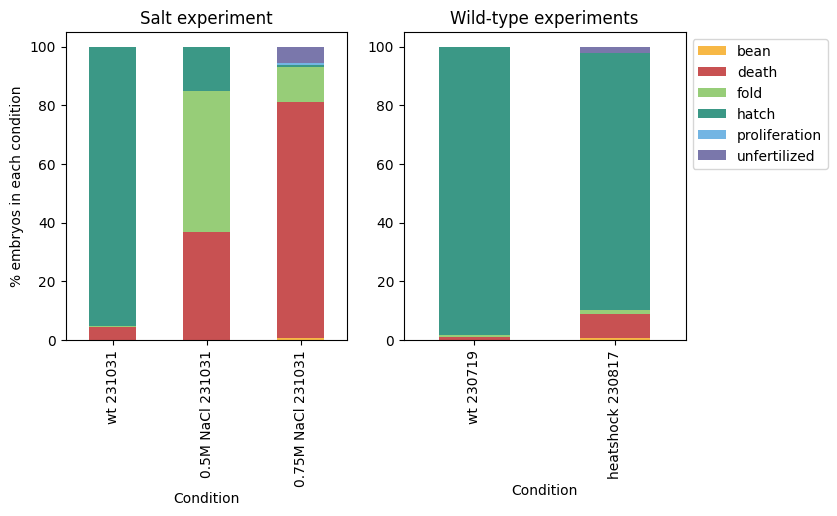

In [15]:
# end state distribution by condition, normalized
condition_dict = {
    'control2023-11-08-preds-for-230719--from-checkpoint-epoch=19-val_loss=0': 'wt 230719',
    'control2023-11-08-preds-for-231013--from-checkpoint-epoch=19-val_loss=0': 'wt 231013',
    'control2023-11-08-preds-for-230817--from-checkpoint-epoch=19-val_loss=0': 'heatshock 230817',
    'control2023-11-08-preds-for-231012--from-checkpoint-epoch=19-val_loss=0': 'wt 231012',
    '0.5M NaCl': '0.5M NaCl 231031',
    'control': 'wt 231031',
    '0.75M NaCl': '0.75M NaCl 231031',
}

# excluded for now
# plot_order_other_species = ['wt 231012', 'wt 231013']

plot_order_salt = ['wt 231031', '0.5M NaCl 231031', '0.75M NaCl 231031']
plot_order_wt = ['wt 230719', 'heatshock 230817']

colors = ['#F7B846', '#C85152', '#97CD78', '#3B9886', '#73B5E3', '#7A77AB', '#F898AE']

data_grouped = (
    data.groupby(['condition', 'embryo_end_states'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / float(x.sum()))
    .unstack()
    .droplevel(0, axis=0)
)
data_grouped = data_grouped.rename(index=condition_dict)
data_grouped_salt = data_grouped.reindex(plot_order_salt)
data_grouped_wt = data_grouped.reindex(plot_order_wt)

f, axs = plt.subplots(1, 2, figsize=(8, 4))
data_grouped_salt.plot(ax=axs[0], kind='bar', stacked=True, color=colors)
data_grouped_wt.plot(ax=axs[1], kind='bar', stacked=True, color=colors)

axs[0].set_ylabel('% embryos in each condition')
axs[0].set_xlabel('Condition')
axs[1].set_xlabel('Condition')

axs[0].legend().remove()
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

axs[0].set_title('Salt experiment')
axs[1].set_title('Wild-type experiments')

if not os.path.exists('plots'):
    os.makedirs('plots')

f.savefig('plots/end_state_distribution_by_condition.svg', bbox_inches='tight')